## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [1]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [2]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [3]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [4]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
7.617
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [18]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 20:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Work It 0 0
The Secret Garden 0 0
The Tax Collector 30000000 0
Project Power 0 0
Deathstroke: Knights & Dragons - The Movie 0 0
Coma 4000000 2363584
Joker 55000000 1074251311
The Kissing Booth 2 0 0
Magic Camp 24000000 0
Inception 160000000 825532764
Avengers: Infinity War 300000000 2046239637
Captain America: Civil War 250000000 1153296293
Made in Italy 0 0
Greyhound 50300000 0
Scoob! 0 9430580
Deep Blue Sea 3 5000000 0
The King of Staten Island 0 0
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn) 75000000 201858461
Spider-Man: Far from Home 160000000 1131927996


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [9]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [6]:
a = tmdb.Movies()
abc = a.popular()

In [7]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Beverly Hills Cop
The Secret Garden


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [15]:
popular_dict[0]

{'popularity': 133.64,
 'vote_count': 334,
 'video': False,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'id': 612706,
 'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'original_language': 'en',
 'original_title': 'Work It',
 'genre_ids': [35, 10402],
 'title': 'Work It',
 'vote_average': 8,
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'release_date': '2020-08-07'}

In [16]:
doop[0]

{'popularity': 18.867,
 'id': 226,
 'video': False,
 'vote_count': 805,
 'vote_average': 7.5,
 'title': "Boys Don't Cry",
 'release_date': '1999-09-02',
 'original_language': 'en',
 'original_title': "Boys Don't Cry",
 'genre_ids': [80, 18],
 'backdrop_path': '/fMT8OC9j3mez0zrz1GGJ1tzHIbZ.jpg',
 'adult': False,
 'overview': 'Female born, Teena Brandon adopts his male identity of Brandon Teena and attempts to find himself and love in Nebraska.',
 'poster_path': '/mnnGtVKxDyLCsqfHC0WfXCJRJvR.jpg'}

In [17]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[612706, 521034, 531499, 605116, 703771, 430155, 475557, 583083, 454433, 27205, 299536, 271110, 659991, 516486, 385103, 703745, 579583, 495764, 429617, 547016]
['Work It', 'The Secret Garden', 'The Tax Collector', 'Project Power', 'Deathstroke: Knights & Dragons - The Movie', 'Coma', 'Joker', 'The Kissing Booth 2', 'Magic Camp', 'Inception', 'Avengers: Infinity War', 'Captain America: Civil War', 'Made in Italy', 'Greyhound', 'Scoob!', 'Deep Blue Sea 3', 'The King of Staten Island', 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)', 'Spider-Man: Far from Home', 'The Old Guard']


In [19]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

430155

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [20]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 133.64, 'vote_count': 334, 'video': False, 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg', 'id': 612706, 'adult': False, 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg', 'original_language': 'en', 'original_title': 'Work It', 'genre_ids': [35, 10402], 'title': 'Work It', 'vote_average': 8, 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.", 'release_date': '2020-08-07'}


In [21]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [22]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path     id  \
995      18.759        4971  False  /4ucLGcXVVSVnsfkGtbLY4XAius8.jpg   9552   
996      18.758        1949  False  /gH27K0S7BiZCsNMxzOQTacG9IZp.jpg   9992   
997      18.758        2117  False  /eGSfqknufcsXmM2Rb59H9SiNd4T.jpg   1089   
998      18.750        1004  False  /cY23k6VQsHVfTQIHf7e887iAfq4.jpg  25793   
999      18.742        6889  False  /3jcbDmRFiQ83drXNOvRDeKHxS0C.jpg    510   

     adult                     backdrop_path original_language  \
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg                en   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg                en   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg                en   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg                en   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg                en   

                      original_title            genre_ids  \
995                     The Exorcist                 [27]   
996           Arthur et les Minimoys  [12, 16, 14, 10751]   
997                      Point Break         [28, 80, 53]   
998                         Precious                 [18]   
999  One Flew Over the Cuckoo's Nest                 [18]   

                               title  vote_average  \
995                     The Exorcist           7.7   
996        Arthur and the Invisibles           6.3   
997                      Point Break           7.1   
998                         Precious           7.2   
999  One Flew Over the Cuckoo's Nest           8.4   

                                              overview release_date  
995  12-year-old Regan MacNeil begins to adapt an e...   1973-05-31  
996  Arthur is a spirited ten-year old whose parent...   2006-12-13  
997  In Los Angeles, a gang of bank robbers call th...   1991-01-31  
998  Set in Harlem in 1987, Claireece "Precious" Jo...   2009-11-06  
999  While serving time for insanity at a state men...   1975-11-18

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [23]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          993 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        980 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [24]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [25]:
copy_mmdf = main_movie_df

In [26]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       133.640         334  False  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg  612706   
1       114.229          75  False   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg  521034   
2       100.096          63  False  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg  531499   
3        98.969         165  False  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg  605116   
4        92.230          78  False  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg  703771   
..          ...         ...    ...                               ...     ...   
995      18.759        4971  False  /4ucLGcXVVSVnsfkGtbLY4XAius8.jpg    9552   
996      18.758        1949  False  /gH27K0S7BiZCsNMxzOQTacG9IZp.jpg    9992   
997      18.758        2117  False  /eGSfqknufcsXmM2Rb59H9SiNd4T.jpg    1089   
998      18.750        1004  False  /cY23k6VQsHVfTQIHf7e887iAfq4.jpg   25793   
999      18.742        6889  False  /3jcbDmRFiQ83drXNOvRDeKHxS0C.jpg     510   

     adult                     backdrop_path original_language  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                en   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                en   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg                en   
3    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                en   
4    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                en   
..     ...                               ...               ...   
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg                en   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg                en   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg                en   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg                en   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg                en   

                                 original_title            genre_ids  \
0                                       Work It          [35, 10402]   
1                             The Secret Garden      [18, 14, 10751]   
2                             The Tax Collector     [28, 80, 18, 53]   
3                                 Project Power        [28, 80, 878]   
4    Deathstroke: Knights & Dragons - The Movie             [28, 16]   
..                                          ...                  ...   
995                                The Exorcist                 [27]   
996                      Arthur et les Minimoys  [12, 16, 14, 10751]   
997                                 Point Break         [28, 80, 53]   
998                                    Precious                 [18]   
999             One Flew Over the Cuckoo's Nest                 [18]   

                                          title  vote_average  \
0                                       Work It           8.0   
1                             The Secret Garden           7.5   
2                             The Tax Collector           5.9   
3                                 Project Power           6.5   
4    Deathstroke: Knights & Dragons - The Movie           6.9   
..                                          ...           ...   
995                                The Exorcist           7.7   
996                   Arthur and the Invisibles           6.3   
997                                 Point Break           7.1   
998                                    Precious           7.2   
999             One Flew Over the Cuckoo's Nest           8.4   

                                              overview release_date  
0    A brilliant but clumsy high school senior vows...   2020-08-07  
1    Mary Lennox is born in India to wealthy Britis...   2020-07-08  
2    David Cuevas is a family man who works as a ga...   2020-08-07  
3    An ex-soldier, a teen and a cop collide in New...   2020-08-14  
4    Ten years ago, Slade Wilson-aka the super-assa...   2020-08-04  
..                                                 ...          ...  
995  12-year-old Regan MacNeil begins to adapt an e...   1973-05-31  
996  Arthur is a spirited ten-year old whose 

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> Which genres are the most popular among films released in the last 6 mos.?

<br> <b>Fifth:</b> Which genres have the most films in production at the moment?

## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular, but just over the last 6 months, as this could help to identify further questions to ask about "popular" films, to determine the reason for their popularity in such a short time. <b>Could it be the films' marketing strategy?</b> Or, perhaps there is an actor or actress which draws a lot of interest? Understanding that these films would've been invested in, on average, over two years ago, it may benefit to dive deeper into why they've been so successful and in such short time.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [27]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}],
 'homepage': 'https://www.netflix.com/title/81132038',
 'id': 612706,
 'imdb_id': 'tt10276470',
 'original_language': 'en',
 'original_title': 'Work It',
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'popularity': 133.64,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'production_companies': [{'id': 47729,
   'logo_path': '/5NRpQ7xxmODXAjt2pRWUFMLVzvP.png',
   'name': 'STX Entertainment',
   'origin_country': 'US'},
  {'id': 10067,
   'logo_path': '/p1kZoVNfkVvk7xyJZEposRxcfh8.png',
   'name': 'Alloy Entertainment',
   'origin_country': 'US'},
  {'id': 137361,
   'logo_path': None,
   'name': 'AK Worldwide',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3

In [28]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
1  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None         0   
2  False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg                  None  30000000   
3  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
4  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   

                                 homepage      id     imdb_id  \
0  https://www.netflix.com/title/81132038  612706  tt10276470   
1                                          521034   tt2702920   
2                                          531499   tt8461224   
3     http://www.netflix.com/projectpower  605116   tt7550000   
4                                          703771  tt12876132   

  original_language                              original_title  \
0                en                                     Work It   
1                en                           The Secret Garden   
2                en                           The Tax Collector   
3                en                               Project Power   
4                en  Deathstroke: Knights & Dragons - The Movie   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     133.640   
1  Mary Lennox is born in India to wealthy Britis...     114.229   
2  David Cuevas is a family man who works as a ga...     100.096   
3  An ex-soldier, a teen and a cop collide in New...      98.969   
4  Ten years ago, Slade Wilson-aka the super-assa...      92.230   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   
2  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg   
3  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
4  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   
2  [{'id': 10246, 'logo_path': '/rREvQNWAxkDfY9CD...   
3  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
4  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     95.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
3    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   

                                             tagline  \
0                            Dance to your own beat.   
1                                                      
2                       Payback comes with interest.   
3  What would you risk for five minutes of pure p...   
4  Never give a paid killer a reason to work for ...   

                                        title  video  vote_average  vote_count  
0                                     Work It  False           8.0         344  
1  

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [29]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3618
---
1563
---
['Kreo Films FZ', 'Franklin Entertainment', 'Screen Arcade', 'Front Street Pictures', 'Saturn Films', 'The Guber-Peters Company', 'Front Street Productions', 'DC Films', 'Pendle Mountain Productions', 'Fondation Cartier pour l’art contemporain', 'Bandito Brothers', 'Street Entertainment', 'VOO', 'Foresight Unlimited', 'Zodiac Features', 'Amberdale Productions', 'Disney Television Animation', 'Rafran Cinematografica', 'The Collective', 'Warner Bros. Pictures España', 'Shanghai Film Group', 'Dillywood', 'Province of British Columbia Production Services Tax Credit', 'Twisted Pictures', 'Muse Productions', 'British Film Commission', 'Union Investment Partners', 'Gorai / Samuelson Productions', 'Bidibul Productions', 'NPV Entertainment', 'Millennium Films', 'Marvel Enterprises', 'Dream Team Films', 'Goldmann Pictures', 'Outlier Society Productions', 'TGIM Films', 'Bandai Entertainment Inc.', 'Zehnte Babelsberg Film', 'Sandollar Productions', 'Nu Boyana Viburno', 'Zide-Perr

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [30]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
1  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None         0   
2  False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg                  None  30000000   
3  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
4  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   

                                 homepage      id     imdb_id  \
0  https://www.netflix.com/title/81132038  612706  tt10276470   
1                                          521034   tt2702920   
2                                          531499   tt8461224   
3     http://www.netflix.com/projectpower  605116   tt7550000   
4                                          703771  tt12876132   

  original_language                              original_title  \
0                en                                     Work It   
1                en                           The Secret Garden   
2                en                           The Tax Collector   
3                en                               Project Power   
4                en  Deathstroke: Knights & Dragons - The Movie   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     133.640   
1  Mary Lennox is born in India to wealthy Britis...     114.229   
2  David Cuevas is a family man who works as a ga...     100.096   
3  An ex-soldier, a teen and a cop collide in New...      98.969   
4  Ten years ago, Slade Wilson-aka the super-assa...      92.230   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   
2  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg   
3  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
4  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   
2  [{'id': 10246, 'logo_path': '/rREvQNWAxkDfY9CD...   
3  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
4  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     95.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
3    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   

                                             tagline  \
0                            Dance to your own beat.   
1                                                      
2                       Payback comes with interest.   
3  What would you risk for five minutes of pure p...   
4  Never give a paid killer a reason to work for ...   

                                        title  video  vote_average  \
0                                     Work It  False           8.0   
1                        

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [31]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [32]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

STX Entertainment  Alloy Entertainment  AK Worldwide  Kreo Films FZ  \
0                    1                    1             1              0   
1                    0                    0             0              0   
2                    0                    0             0              0   
3                    0                    0             0              0   
4                    0                    0             0              0   
..                 ...                  ...           ...            ...   
995                  0                    0             0              0   
996                  0                    0             0              0   
997                  0                    0             0              0   
998                  0                    0             0              0   
999                  0                    0             0              0   

     Franklin Entertainment  Screen Arcade  Front Street Pictures  \
0                         0              0                      0   
1                         0              0                      0   
2                         0              0                      0   
3                         0              1                      0   
4                         0              0                      0   
..                      ...            ...                    ...   
995                       0              0                      0   
996                       0              0                      0   
997                       0              0                      0   
998                       0              0                      0   
999                       0              0                      0   

     Saturn Films  The Guber-Peters Company  Front Street Productions  \
0               0                         0                         0   
1               0                         0                         0   
2               0                         0                         0   
3               0                         0                         0   
4               0                         0                         0   
..            ...                       ...                       ...   
995             0                         0                         0   
996             0                         0                         0   
997             0                         0                         0   
998             0                         0                         0   
999             0                         0                         0   

     DC Films  Pendle Mountain Productions  \
0           0                            0   
1           0                            0   
2           0                            0   
3           0                            0   
4           0                            0   
..        ...                          ...   
995         0                            0   
996         0                            0   
997         0                            0   
998         0                            0   
999         0                            0   

     Fondation Cartier pour l’art contemporain  Bandito Brothers  \
0                                            0                 0   
1                                            0                 0   
2                                            0                 0   
3                                            0                 0   
4                                            0                 0   
..                                         ...               ...   
995                                          0                 0   
996                                          0                 0   
997                                          0                 0   
998                                          0                 0   
999                                          0                 0   

     Street Ente

In [33]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
4    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
..     ...                               ...   
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 12263, 'name': 'The Exorcist Collection...   8000000   
996  {'id': 85817, 'name': 'Arthur and the Invisibl...  86000000   
997                                               None  24000000   
998                                               None  10000000   
999                                               None   3000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
..                                                 ...   
995                     [{'id': 27, 'name': 'Horror'}]   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
997  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
998                      [{'id': 18, 'name': 'Drama'}]   
999                      [{'id': 18, 'name': 'Drama'}]   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3       http://www.netflix.com/projectpower  605116   tt7550000   
4                                            703771  tt12876132   
..                                      ...     ...         ...   
995      http://theexorcist.warnerbros.com/    9552   tt0070047   
996                                            9992   tt0344854   
997                                            1089   tt0102685   
998        http://www.weareallprecious.com/   25793   tt0929632   
999                                             510   tt0073486   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                           The Secret Garden   
2                  en                           The Tax Collector   
3                  en                               Project Power   
4                  en  Deathstroke: Knights & Dragons - The Movie   
..                ...                                         ...   
995                en                                The Exorcist   
996                en                      Arthur et les Minimoys   
997                en                                 Point Break   
998                en                                    Precious   
999                en             One Flew Over the Cuckoo's Nest   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.640   
1    Mary Lennox is born in India to wealthy Britis...     114.229   
2    David Cuevas is a family man who works as a ga...     100.096   


## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [34]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['net_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['net_income'] = newshaq['net_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
4    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
..     ...                               ...   
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 12263, 'name': 'The Exorcist Collection...   8000000   
996  {'id': 85817, 'name': 'Arthur and the Invisibl...  86000000   
997                                               None  24000000   
998                                               None  10000000   
999                                               None   3000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
..                                                 ...   
995                     [{'id': 27, 'name': 'Horror'}]   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
997  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
998                      [{'id': 18, 'name': 'Drama'}]   
999                      [{'id': 18, 'name': 'Drama'}]   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3       http://www.netflix.com/projectpower  605116   tt7550000   
4                                            703771  tt12876132   
..                                      ...     ...         ...   
995      http://theexorcist.warnerbros.com/    9552   tt0070047   
996                                            9992   tt0344854   
997                                            1089   tt0102685   
998        http://www.weareallprecious.com/   25793   tt0929632   
999                                             510   tt0073486   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                           The Secret Garden   
2                  en                           The Tax Collector   
3                  en                               Project Power   
4                  en  Deathstroke: Knights & Dragons - The Movie   
..                ...                                         ...   
995                en                                The Exorcist   
996                en                      Arthur et les Minimoys   
997                en                                 Point Break   
998                en                                    Precious   
999                en             One Flew Over the Cuckoo's Nest   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.640   
1    Mary Lennox is born in India to wealthy Britis...     114.229   
2    David Cuevas is a family man who works as a ga...     100.096   


## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [35]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
4    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
..     ...                               ...   
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 12263, 'name': 'The Exorcist Collection...   8000000   
996  {'id': 85817, 'name': 'Arthur and the Invisibl...  86000000   
997                                               None  24000000   
998                                               None  10000000   
999                                               None   3000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
..                                                 ...   
995                     [{'id': 27, 'name': 'Horror'}]   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
997  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
998                      [{'id': 18, 'name': 'Drama'}]   
999                      [{'id': 18, 'name': 'Drama'}]   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3       http://www.netflix.com/projectpower  605116   tt7550000   
4                                            703771  tt12876132   
..                                      ...     ...         ...   
995      http://theexorcist.warnerbros.com/    9552   tt0070047   
996                                            9992   tt0344854   
997                                            1089   tt0102685   
998        http://www.weareallprecious.com/   25793   tt0929632   
999                                             510   tt0073486   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                           The Secret Garden   
2                  en                           The Tax Collector   
3                  en                               Project Power   
4                  en  Deathstroke: Knights & Dragons - The Movie   
..                ...                                         ...   
995                en                                The Exorcist   
996                en                      Arthur et les Minimoys   
997                en                                 Point Break   
998                en                                    Precious   
999                en             One Flew Over the Cuckoo's Nest   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.640   
1    Mary Lennox is born in India to wealthy Britis...     114.229   
2    David Cuevas is a family man who works as a ga...     100.096   


In [36]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg   

                                 belongs_to_collection    budget  \
995  {'id': 12263, 'name': 'The Exorcist Collection...   8000000   
996  {'id': 85817, 'name': 'Arthur and the Invisibl...  86000000   
997                                               None  24000000   
998                                               None  10000000   
999                                               None   3000000   

                                                genres  \
995                     [{'id': 27, 'name': 'Horror'}]   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
997  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
998                      [{'id': 18, 'name': 'Drama'}]   
999                      [{'id': 18, 'name': 'Drama'}]   

                               homepage     id    imdb_id original_language  \
995  http://theexorcist.warnerbros.com/   9552  tt0070047                en   
996                                       9992  tt0344854                en   
997                                       1089  tt0102685                en   
998    http://www.weareallprecious.com/  25793  tt0929632                en   
999                                        510  tt0073486                en   

                      original_title  \
995                     The Exorcist   
996           Arthur et les Minimoys   
997                      Point Break   
998                         Precious   
999  One Flew Over the Cuckoo's Nest   

                                              overview  popularity  \
995  12-year-old Regan MacNeil begins to adapt an e...      18.759   
996  Arthur is a spirited ten-year old whose parent...      18.758   
997  In Los Angeles, a gang of bank robbers call th...      18.758   
998  Set in Harlem in 1987, Claireece "Precious" Jo...      18.750   
999  While serving time for insanity at a state men...      18.742   

                          poster_path  \
995  /4ucLGcXVVSVnsfkGtbLY4XAius8.jpg   
996  /gH27K0S7BiZCsNMxzOQTacG9IZp.jpg   
997  /eGSfqknufcsXmM2Rb59H9SiNd4T.jpg   
998  /cY23k6VQsHVfTQIHf7e887iAfq4.jpg   
999  /3jcbDmRFiQ83drXNOvRDeKHxS0C.jpg   

                                  production_companies  \
995  [{'id': 48184, 'logo_path': None, 'name': 'Hoy...   
996  [{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...   
997  [{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...   
998  [{'id': 4424, 'logo_path': None, 'name': 'Smok...   
999  [{'id': 60, 'logo_path': '/oJXpAs4I3W46e4dkaOE...   

                                  production_countries release_date  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   1973-05-31   
996           [{'iso_3166_1': 'FR', 'name': 'France'}]   2006-12-13   
997  [{'iso_3166_1': 'US', 'name': 'United States o...   1991-01-31   
998  [{'iso_3166_1': 'US', 'name': 'United States o...   2009-11-06   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   1975-11-18   

       revenue  runtime                                   spoken_languages  \
995  441306145    122.0  [{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...   
996  107944236     94.0           [{'iso_639_1': 'en', 'name': 'English'}]   
997   83531958    120.0           [{'iso_639_1': 'en', 'name': 'English'}]   
998   47536959    110.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
999  108981275    133.0           [{'iso_639_1': 'en', 'name': 'English'}]   

       status                                            tagline  \
995  Released  Something almost beyond comprehension is happe...   
996  Released             Adventure awaits in your own backyard.   
997  Released                              100% Pure Adrenaline!   
998  Released                                We are all p

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [38]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '08-01-2017'
end_date = '07-31-2020'

In [39]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
5    False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
6    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
7    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
10   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
..     ...                               ...   
976  False  /7t88SoT3Dd8DhGnQuVoSbMNUl3W.jpg   
988  False  /euAMcJLG26pW1kv4kPEtVEwwroQ.jpg   
989  False  /3ZQRLuXNTbewOHDfxF51fy74gh4.jpg   
990  False  /ejcwWvDNRSATxEuRNEjK01seIem.jpg   
992  False  /4NJ9Wbib4YfvnZyyvV8WSLOAQUh.jpg   

                                 belongs_to_collection     budget  \
1                                                 None          0   
5                                                 None    4000000   
6                                                 None   55000000   
7    {'id': 726619, 'name': 'The Kissing Booth Coll...          0   
10   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
..                                                 ...        ...   
976                                               None          0   
988                                               None    5000000   
989                                               None   35000000   
990                                               None          0   
992                                               None          0   

                                                genres  \
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
5    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
6    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
7    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
10   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
..                                                 ...   
976  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
988                    [{'id': 36, 'name': 'History'}]   
989  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
990  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
992  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   

                                              homepage      id    imdb_id  \
1                                                       521034  tt2702920   
5                                                       430155  tt6087226   
6                           http://www.jokermovie.net/  475557  tt7286456   
7               https://www.netflix.com/title/81026818  583083  tt9784456   
10   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
..                                                 ...     ...        ...   
976                      http://www.smallfootmovie.com  446894  tt6182908   
988                          http://www.paulmovie.com/  476968  tt7388562   
989  https://www.lionsgate.com/movies/the-hurricane...  430040  tt5360952   
990                                                     395841  tt5057140   
992         http://www.thepeanutbutterfalconmovie.com/  463257  tt4364194   

    original_language            original_title  \
1                  en         The Secret Garden   
5                  ru                      Кома   
6                  en                     Joker   
7                  en       The Kissing Booth 2   
10                 en    Avengers: Infinity War   
..                ...                       ...   
976                en                 Smallfoot   
988                en   Paul, Apostle of Christ   
989                en       The Hurricane Heist   
990                en             Hold the Dark   
992                en  The Peanut Butter Falcon   

                                              overview  popularity  \
1    Mary Lennox is born in India to wealthy Britis...     114.229   
5    A young and talented architect comes to his se...      86.463   
6    During the 1980s, a failed stand-up comedian i...      80.636   
7    With college decisions looming, Elle juggles h...      79.775   
10   As the Av

In [40]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['net_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
63  False  /orjiB3oUIsyz60hoEqkiGpy5CeO.jpg   
10  False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
55  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
26  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
83  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
63  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
10  {'id': 86311, 'name': 'The Avengers Collection...  300000000   
55                                               None  260000000   
26  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
83                                               None  200000000   

                                               genres  \
63  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
10  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
55  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
26  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
83  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
63     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
10  https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
55       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
26                 https://movies.disney.com/frozen-2  330457  tt4520988   
83  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
63                en       Avengers: Endgame   
10                en  Avengers: Infinity War   
55                en           The Lion King   
26                en               Frozen II   
83                en           Black Panther   

                                             overview  popularity  \
63  After the devastating events of Avengers: Infi...      38.360   
10  As the Avengers and their allies have continue...      77.197   
55  Simba idolizes his father, King Mufasa, and ta...      39.475   
26  Elsa, Anna, Kristoff and Olaf head far into th...      55.990   
83  King T'Challa returns home from America to the...      36.085   

                         poster_path  \
63  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
10  /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
55  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
26  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
83  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
63  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
10  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
55  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
26  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
83  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
63  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
10  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
55  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
26  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
83  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
63  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
10  2046239637    149.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
55  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
26  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
83  1346739107    134.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
63  Released        Part of the journey is the end.       Avengers: Endgame   
10  Released  An entire universe. Once and for all.  Avengers: Infinity War   
55  Released                 The King has Returned.           The Lion King   
26  Released      

In [41]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['STX Entertainment',
 'Alloy Entertainment',
 'AK Worldwide',
 'Kreo Films FZ',
 'Franklin Entertainment',
 'Screen Arcade',
 'Front Street Pictures',
 'Saturn Films',
 'The Guber-Peters Company',
 'Front Street Productions',
 'DC Films',
 'Pendle Mountain Productions',
 'Fondation Cartier pour l’art contemporain',
 'Bandito Brothers',
 'Street Entertainment',
 'VOO',
 'Foresight Unlimited',
 'Zodiac Features',
 'Amberdale Productions',
 'Disney Television Animation',
 'Rafran Cinematografica',
 'The Collective',
 'Warner Bros. Pictures España',
 'Shanghai Film Group',
 'Dillywood',
 'Province of British Columbia Production Services Tax Credit',
 'Twisted Pictures',
 'Muse Productions',
 'British Film Commission',
 'Union Investment Partners',
 'Gorai / Samuelson Productions',
 'Bidibul Productions',
 'NPV Entertainment',
 'Millennium Films',
 'Marvel Enterprises',
 'Dream Team Films',
 'Goldmann Pictures',
 'Outlier Society Productions',
 'TGIM Films',
 'Bandai Entertainment Inc.',
 

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [42]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_net_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_net_dict[c] = grander_df['net_income'].sum()

In [43]:
#Now, to create the DataFrame.
company_total_net = pd.DataFrame(list(company_net_dict.items()),columns=
             ['production_companies','total_net_income']).sort_values(by='total_net_income',ascending=False)
ctn = company_total_net.iloc[:20,:].set_index('production_companies')
ctn

total_net_income
production_companies                      
Walt Disney Pictures            9400927281
Marvel Studios                  8439633363
Warner Bros. Pictures           7042751472
Universal Pictures              4870349351
Columbia Pictures               3456606071
DC Comics                       2776029145
DC Films                        2776029145
DC Entertainment                2776029145
Sony Pictures                   2765939758
20th Century Fox                2722827240
New Line Cinema                 2680522239
Pixar                           2469907386
Perfect World Pictures          2320844709
Pascal Pictures                 2140188287
The Safran Company              2108313672
Lucasfilm Ltd.                  2099636510
Seven Bucks Productions         2096971315
Lin Pictures                    2069097982
Legendary Entertainment         1940477641
Matt Tolmach Productions        1796946191

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [44]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

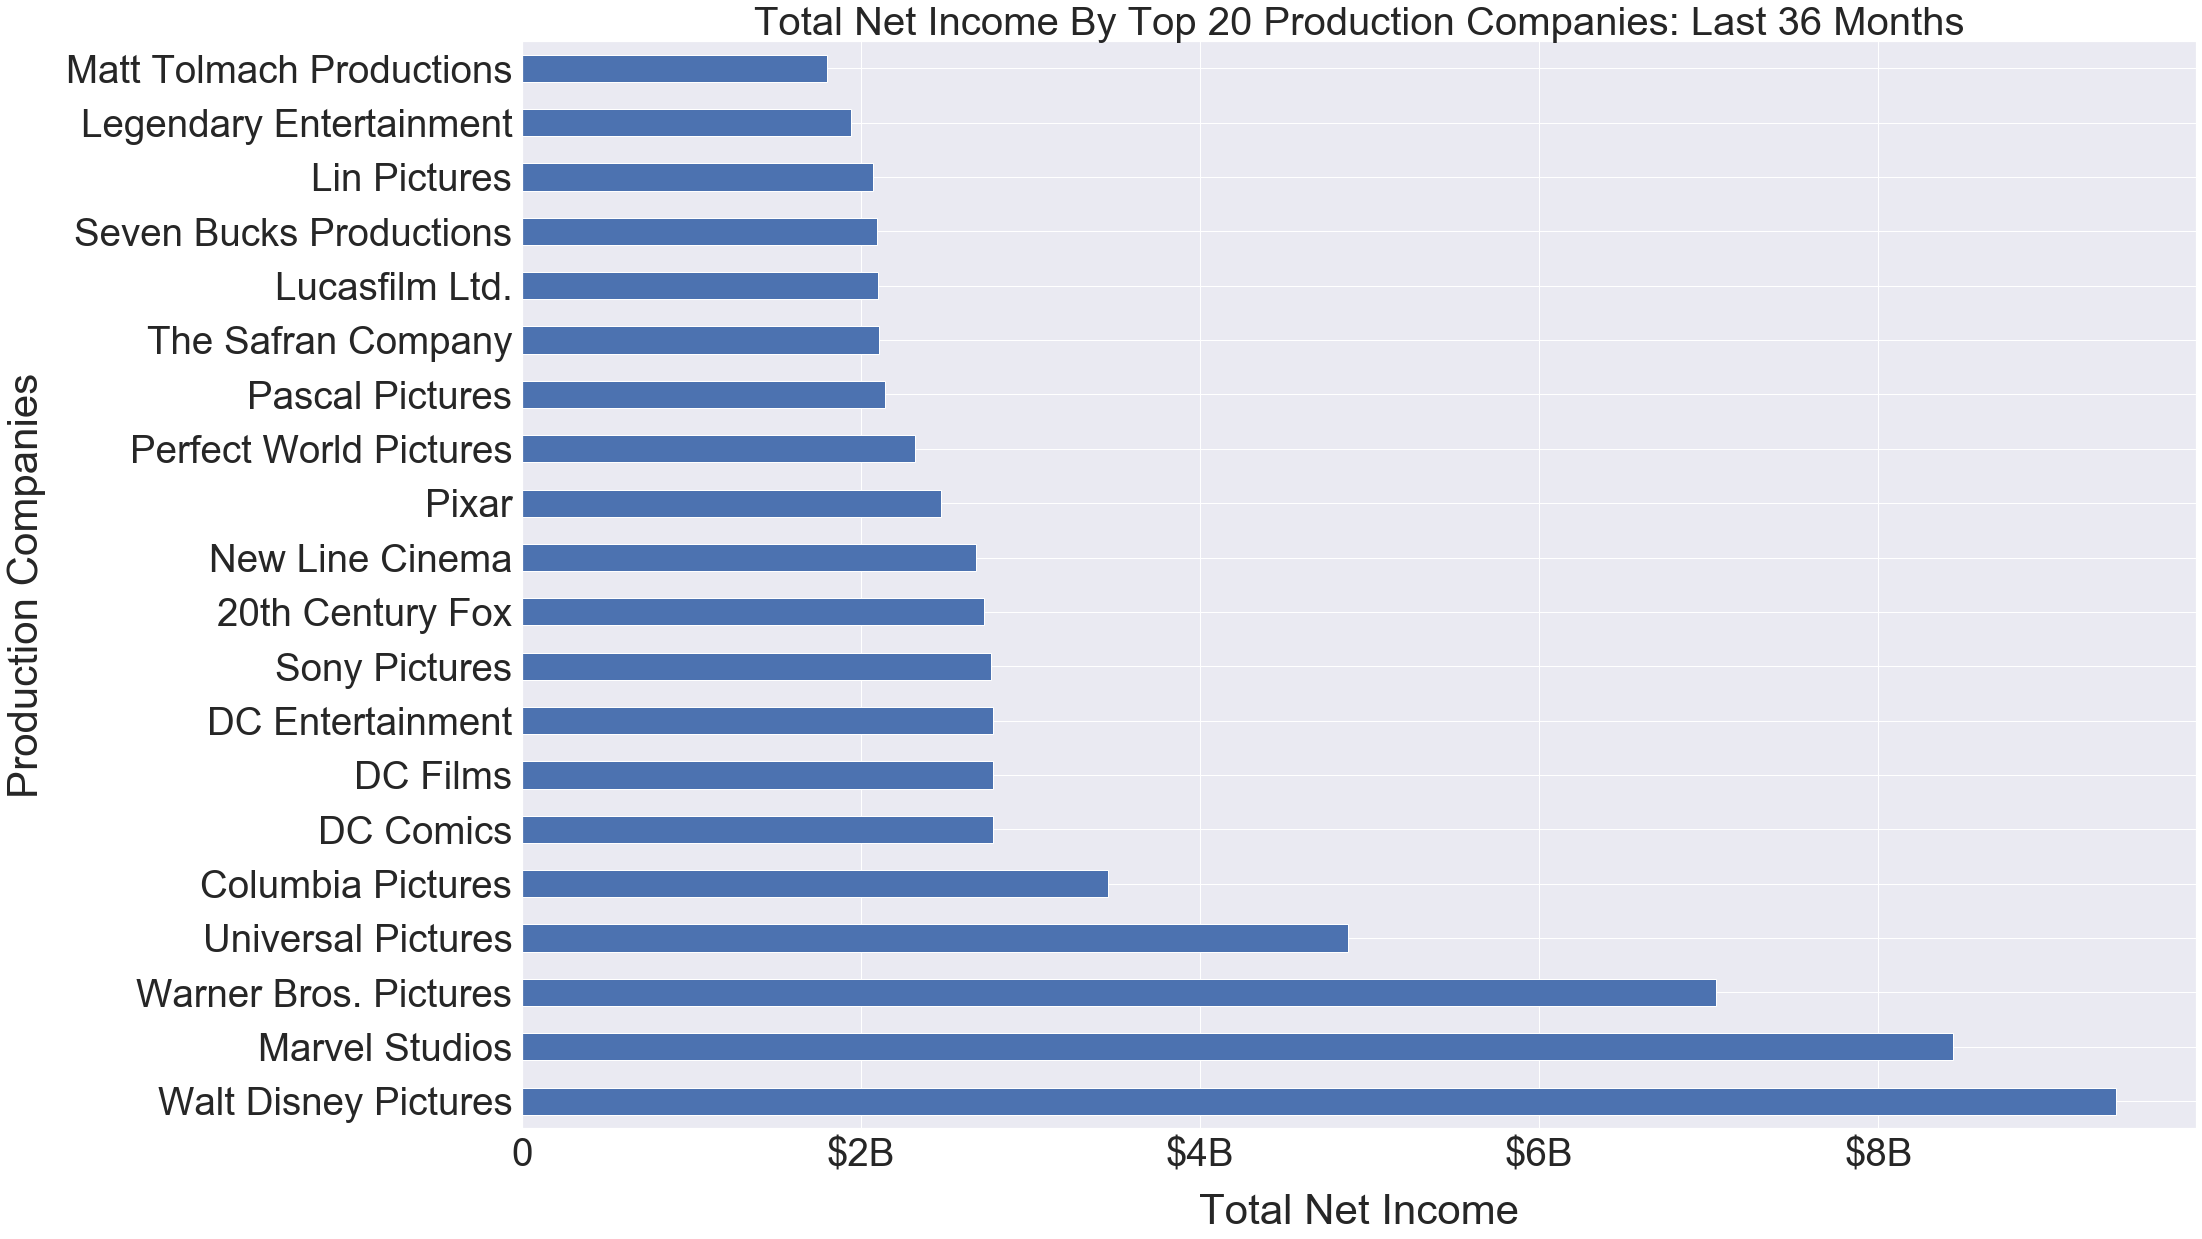

In [46]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=2.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Net Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Net Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [47]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [48]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Family': 1, 'Music': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Animation': 1, 'Family': 1},
 {'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Fantasy': 1, 'Romance': 1, 'Family': 1},
 {'Drama': 1, 'Music': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy':

In [49]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Drama              106.0
Action             103.0
Thriller            94.0
Comedy              76.0
Adventure           73.0
Science Fiction     60.0
Horror              55.0
Fantasy             55.0
Crime               37.0
Family              37.0
Romance             32.0
Animation           29.0
Mystery             25.0
History             13.0
Music               12.0
War                  7.0
Documentary          2.0
TV Movie             1.0
dtype: float64

### Action, Drama + Thrillers FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

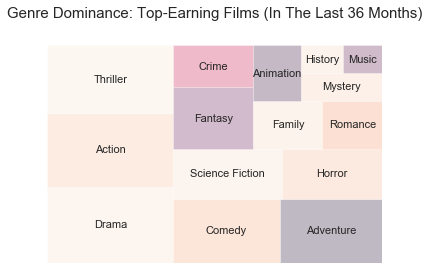

In [51]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':11})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action, Drama + Thriller Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [52]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','net_income']].sort_values(by=['net_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  net_income
449               The Irishman      23.132  -151000000
516              6 Underground      22.305  -150000000
168               Artemis Fowl      30.819  -125000000
43                      Onward      43.410   -96818581
882                     Bright      19.393   -90000000
..                         ...         ...         ...
555               The Platform      21.941           0
992   The Peanut Butter Falcon      18.789           0
339              The Kill Team      25.140           0
387           The Perfect Date      24.237           0
16   The King of Staten Island      71.497           0

[100 rows x 3 columns]

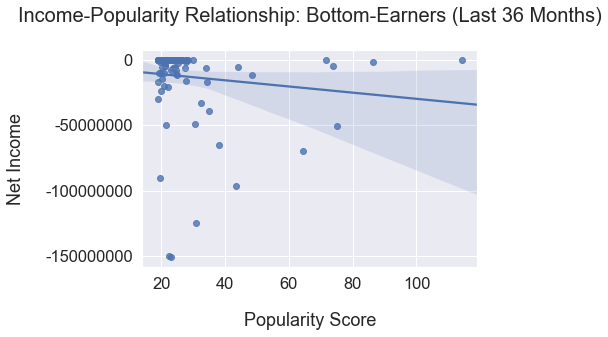

In [129]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["net_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Net Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [54]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','net_income']].sort_values(by=['net_income'],ascending=False)
simpl_top

title  popularity  net_income
63        Avengers: Endgame      38.360  2441800564
10   Avengers: Infinity War      77.197  1746239637
55            The Lion King      39.475  1396943394
26                Frozen II      55.990  1300026933
83            Black Panther      36.085  1146739107
..                      ...         ...         ...
882                  Bright      19.393   -90000000
43                   Onward      43.410   -96818581
168            Artemis Fowl      30.819  -125000000
516           6 Underground      22.305  -150000000
449            The Irishman      23.132  -151000000

[288 rows x 3 columns]

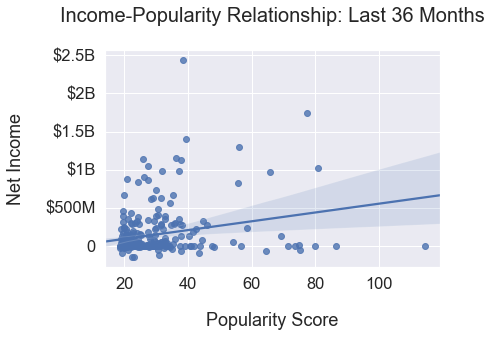

In [128]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["net_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Net Income',labelpad=20)
plt.title('Income-Popularity Relationship: Last 36 Months', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Takeaway #2: More Money More (Popularity) Problems?

Interestingly enough, it looks like there's not as much positive correlation between income and popularity scores as the bottom-earners' insights showed. One can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

Could it be that <b>genre popularity</b> is more reliable than movie popularity?

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which originally non-English language films have had the most success, and ultimately, what's the most "income-positive" country according to the data?

It seems that a good popularity score is difficult to come by. But, what about for non-English language films? For this question, I'd like to investigate how popular non-English language films have done. The goal is to be able to compare with the main insights I've gathered so far.

The first thing I'll do is obtain the proper dataframe.

In [66]:
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
4    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
..     ...                               ...   
995  False  /xcjJ5khg2yzOa282mza39Lbrm7j.jpg   
996  False  /nAJ7kA7ve15Bv6xv78XPJiovtZM.jpg   
997  False  /ykuDQ7DsIRuaGLqBkUXxtWdZYQf.jpg   
998  False  /uSi5OqbdD4bo6fIO8nd0SENAzIY.jpg   
999  False  /5Q1TS4BR9QaoHfkYD06h3ezVshP.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 12263, 'name': 'The Exorcist Collection...   8000000   
996  {'id': 85817, 'name': 'Arthur and the Invisibl...  86000000   
997                                               None  24000000   
998                                               None  10000000   
999                                               None   3000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
..                                                 ...   
995                     [{'id': 27, 'name': 'Horror'}]   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
997  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
998                      [{'id': 18, 'name': 'Drama'}]   
999                      [{'id': 18, 'name': 'Drama'}]   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3       http://www.netflix.com/projectpower  605116   tt7550000   
4                                            703771  tt12876132   
..                                      ...     ...         ...   
995      http://theexorcist.warnerbros.com/    9552   tt0070047   
996                                            9992   tt0344854   
997                                            1089   tt0102685   
998        http://www.weareallprecious.com/   25793   tt0929632   
999                                             510   tt0073486   

    original_language                              original_title  \
0                  en                                     Work It   
1                  en                           The Secret Garden   
2                  en                           The Tax Collector   
3                  en                               Project Power   
4                  en  Deathstroke: Knights & Dragons - The Movie   
..                ...                                         ...   
995                en                                The Exorcist   
996                en                      Arthur et les Minimoys   
997                en                                 Point Break   
998                en                                    Precious   
999                en             One Flew Over the Cuckoo's Nest   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.640   
1    Mary Lennox is born in India to wealthy Britis...     114.229   
2    David Cuevas is a family man who works as a ga...     100.096   


In [89]:
#Organize (or, group) the movie list according to the original language

non_eng = pd.DataFrame(newshaq)
non_eng_checker = ~non_eng.original_language.str.contains('en')
non_eng_df = non_eng[non_eng_checker]
non_eng_df.sort_values('net_income',ascending=False)

adult                     backdrop_path  \
292  False  /bGksau9GGu0uJ8DJQ8DYc9JW5LM.jpg   
143  False  /mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg   
118  False  /Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg   
24   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
210  False  /iuFbU5jiNh8DAxLBGifZCvv3KmB.jpg   
..     ...                               ...   
678  False  /wZjsOvkv2jybgnTAuRF41WPnezs.jpg   
720  False  /s3pniDBtG52O26WySm6HY0YLVWh.jpg   
101  False  /aWsVwgG324dFQS5xHEjB7OCOT9w.jpg   
862  False  /y3XMIea7mwTzxt3NFFXi5YJKeFJ.jpg   
176  False  /mPPj0OXBP7uokY1hjkgdb13jhTY.jpg   

                                 belongs_to_collection    budget  \
292                                               None  13000000   
143                                               None         0   
118                                               None  19000000   
24                                                None  11363000   
210                                               None  24000000   
..                                                 ...       ...   
678                                               None  10000000   
720                                               None  11332619   
101  {'id': 619537, 'name': 'Train to Busan Collect...  17000000   
862  {'id': 23616, 'name': 'Naruto Collection', 'po...  29000000   
176  {'id': 428046, 'name': 'Viy Collection', 'post...  49000000   

                                                genres  \
292  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
143  [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...   
118  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
24   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
210  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...   
..                                                 ...   
678  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
720  [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...   
101  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
862  [{'id': 10751, 'name': 'Family'}, {'id': 28, '...   
176  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                                              homepage      id    imdb_id  \
292                                                      77338  tt1675434   
143    https://www.funimationfilms.com/movie/yourname/  372058  tt5311514   
118             http://movies.disney.com/spirited-away     129  tt0245429   
24                     https://www.parasite-movie.com/  496243  tt6751668   
210                                                       4935  tt0347149   
..                                                 ...     ...        ...   
678                                                      11713  tt0068767   
720  https://nostromopictures.com/film-detail/palm-...  274109  tt3202202   
101  https://www.wellgousa.com/films/train-to-busan...  581392  tt8850222   
862                       http://www.naruto-movie.com/   20982  tt0988982   
176  https://www.defiant-ent.com/product/the-iron-m...  428045  tt6218010   

    original_language        original_title  \
292                fr          Intouchables   
143                ja                 君の名は。   
118                ja              千と千尋の神隠し   
24                 ko                   기생충   
210                ja               ハウルの動く城   
..                ...                   ...   
678                zh                   精武門   
720                es  Palmeras en la nieve   
101                ko                    반도   
862                ja  劇場版 NARUTO -ナルト- 疾風伝   
176                ru  Тайна Печати дракона   

                                              overview  popularity  \
292  A true story of two men who should never have ...      26.207   
143  High schoolers Mitsuha and Taki are complete s...      32.033   
118  A young girl, Chihiro, becomes trapped in a st...      33.078   
24   All unemployed, Ki-taek's family takes peculia...      58.422   
210  When Sophie, a shy young woman, is cursed with...      29.128   
..  

In [124]:
ne_df = non_eng_df.loc[:,['title','popularity','original_language','release_date','net_income']].sort_values(by=['net_income'],ascending=False)
ne_df

title  popularity original_language  \
292                            The Intouchables      26.207                fr   
143                                  Your Name.      32.033                ja   
118                               Spirited Away      33.078                ja   
24                                     Parasite      58.422                ko   
210                        Howl's Moving Castle      29.128                ja   
..                                          ...         ...               ...   
678                                Fist of Fury      20.780                zh   
720                      Palm Trees in the Snow      20.458                es   
101                                   Peninsula      34.348                ko   
862                  Naruto Shippuden the Movie      19.540                ja   
176  Journey to China: The Mystery of Iron Mask      30.503                ru   

    release_date  net_income  
292   2011-11-02   413480871  
143   2016-08-26   357986087  
118   2001-07-20   255925095  
24    2019-05-30   234561070  
210   2004-11-19   212049757  
..           ...         ...  
678   1972-03-22   -10000000  
720   2015-12-25   -11332619  
101   2020-07-15   -17000000  
862   2007-08-04   -29000000  
176   2019-08-16   -49000000  

[74 rows x 5 columns]

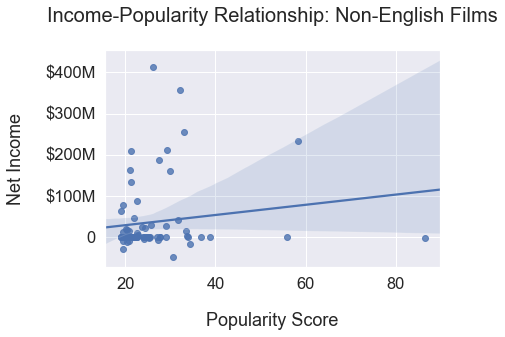

In [127]:
pop_net_non_eng = ne_df
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_non_eng["popularity"], y=pop_net_non_eng["net_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Net Income',labelpad=20)
plt.title('Income-Popularity Relationship: Non-English Films', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

In [155]:
newshaq.groupby(['original_language'])['net_income'].sum().sort_values(ascending=False)

original_language
en    182644838342
ja      1429001724
fr       585070699
ko       355827505
it       250161588
es        92795851
th        19012926
de         4983582
ca               0
bo               0
hi               0
nl               0
pl               0
pt               0
da        -5256817
zh       -10000000
ru       -12923983
Name: net_income, dtype: int64

In [173]:
def cool_func_langs(row):

    num_of_langs = [l['name'] for l in row['spoken_languages']]
    letsgo = {}
    num_of_lang_list = []
    
    for i in num_of_langs:
        if i != '':
            letsgo[i] = 1
            
    return letsgo

In [199]:
lang_sum = newshaq.apply(lambda r: cool_func_langs(r), axis=1).to_list()
lang_sum

[{'English': 1},
 {'English': 1},
 {'Español': 1, 'English': 1},
 {'English': 1},
 {'Français': 1, 'English': 1},
 {'Pусский': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, '日本語': 1, 'Français': 1},
 {'English': 1},
 {'Română': 1, 'English': 1, 'Deutsch': 1, 'Pусский': 1},
 {'English': 1, 'Italiano': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, '普通话': 1},
 {'Český': 1, 'Nederlands': 1, 'English': 1, 'Deutsch': 1, 'Italiano': 1},
 {'English': 1, 'Italiano': 1, 'Pусский': 1, 'العربية': 1, 'Français': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, 'Deutsch': 1, '한국어/조선말': 1},
 {'English': 1},
 {'English': 1},
 {'日本語': 1},
 {'English': 1},
 {'English': 1, 'Norsk': 1},
 {'Deutsch': 1, 'English': 1, 'Italiano': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, 'Français': 1, 'Deutsch': 1},
 {'English': 1},
 {'Engl

In [200]:
lang_sum_list = []
for l in lang_sum:
    lang_sum_list.append(len(l))

lang_sum_list

[1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 5,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 3,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 4,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 6,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,


In [201]:
lang_sum_df_col = pd.DataFrame(lang_sum_list,columns=['number_of_languages'])
lang_sum_df_col

number_of_languages
0                      1
1                      1
2                      2
3                      1
4                      2
..                   ...
995                    6
996                    1
997                    1
998                    2
999                    1

[1000 rows x 1 columns]

In [207]:
major_df = pd.concat([newshaq, lang_sum_df_col], axis=1)
major_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
1  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None         0   
2  False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg                  None  30000000   
3  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
4  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
4  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   

                                 homepage      id     imdb_id  \
0  https://www.netflix.com/title/81132038  612706  tt10276470   
1                                          521034   tt2702920   
2                                          531499   tt8461224   
3     http://www.netflix.com/projectpower  605116   tt7550000   
4                                          703771  tt12876132   

  original_language                              original_title  \
0                en                                     Work It   
1                en                           The Secret Garden   
2                en                           The Tax Collector   
3                en                               Project Power   
4                en  Deathstroke: Knights & Dragons - The Movie   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     133.640   
1  Mary Lennox is born in India to wealthy Britis...     114.229   
2  David Cuevas is a family man who works as a ga...     100.096   
3  An ex-soldier, a teen and a cop collide in New...      98.969   
4  Ten years ago, Slade Wilson-aka the super-assa...      92.230   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   
2  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg   
3  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
4  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   
2  [{'id': 10246, 'logo_path': '/rREvQNWAxkDfY9CD...   
3  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
4  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     95.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
3    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   

                                             tagline  \
0                            Dance to your own beat.   
1                                                      
2                       Payback comes with interest.   
3  What would you risk for five minutes of pure p...   
4  Never give a paid killer a reason to work for ...   

                                        title  video  vote_average  \
0                                     Work It  False           8.0   
1                        

In [216]:
major_df.groupby(['original_language','number_of_languages'])['net_income'].mean()

original_language  number_of_languages
bo                 3                      0.000000e+00
ca                 2                      0.000000e+00
da                 1                     -5.256817e+06
de                 1                      2.491791e+06
en                 0                      2.798975e+07
                   1                      1.876245e+08
                   2                      2.277993e+08
                   3                      1.943976e+08
                   4                      1.942019e+08
                   5                      2.804556e+08
                   6                      6.771761e+08
                   8                      2.717097e+08
                   9                      5.696536e+08
es                 1                      1.573111e+07
                   2                     -1.133262e+07
                   3                     -5.989313e+06
                   5                      0.000000e+00
fr                 1      